# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Импортируем библиотеку pandas для работы с данными и библеотеку matplotlib для работы с гиситрограммами и другими функциями визуализации, а также библиотеку для работы с целочисленными значениями

In [1]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

Присвоим переменную data и откроем таблицу

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

Просмотрим первые 15 строк таблицы для ознакомления с данными

In [3]:
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведим информацию о таблице и нулевых данных в ней

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   


Используя полученную информацию, определим дынные и типы, которые нужно изменить:
1) first_day_exposition заменим на более читабельный фрмат даты (y-m-d)

2) ceiling_height много пропусков, требуется заполнить (возможно медианным значением)

3) floors_total имеются пропуски, а также тип данных float64(число с плавающей точкой), заменим его на int64(целое число)

4) living_area имеются пропуски(заменим медианой), а также исправим тип на int64

5) is_apartment-данные с информацие о том аппартаменты тип недвижимости или нет, изменим на булевой тип и заменим пропуски False     

6) kitchen_area имеются пропуски(заменим медианой), а также исправим тип на int64  

7) balcony- количество балконов в квартире, исправим тип на int64, а также заменим пропуски 0(нет балкона)        

8) locality_name- есть пропуски, но количество маленькое(заменять не будем), заменим неявные дубликаты

9) airports_nearest- большое количетсво пропусков (возможно стоит заменить медианой)

10) cityCenters_nearest-есть пропуски, а также нужно привести название столбца в приличный вид
11) parks_around3000 и ponds_around3000- много пропусков (заменим медианой), а также приведем данные к количественному типу (int)

12) parks_nearest и ponds_nearest- много пропусков (заменим медианой)

13) days_exposition- много пропусков, приведем к целочисленному типу

При обработке данных будем использовать медиану, так как при больших вбросах в данных, среднее не актуально


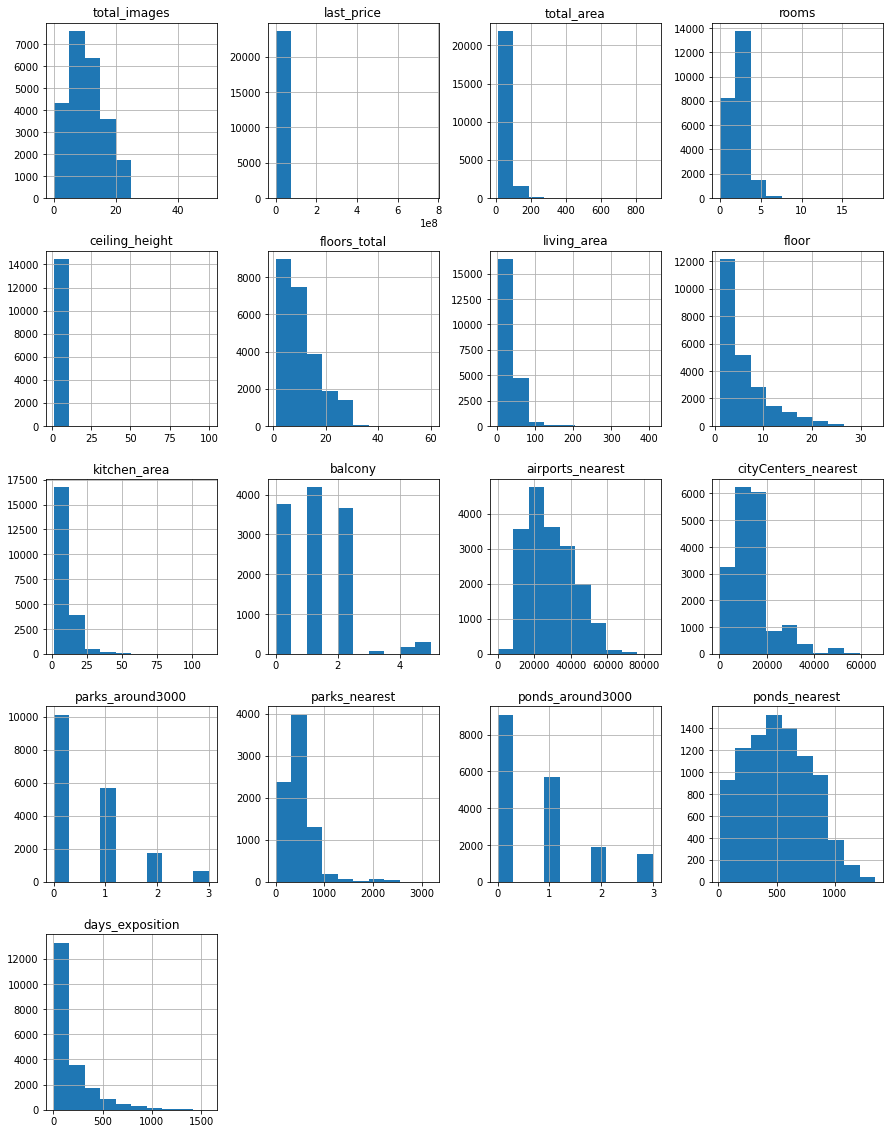

In [5]:
data.hist(figsize=(15, 20))
plt.show()

In [6]:
data.duplicated().sum()

0

Дубликатов нет

### Предобработка данных

Выведем количество пропусков по каждому столбцу и исправим их

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Так как в данных floors_total малый процент пропусков, удалим их и приведем данные к целочисленному типу

In [8]:
data.dropna(subset=['floors_total'], inplace=True)
data['floors_total'] = data['floors_total'].astype(int)

Приведем last_price в целочисленный вид для удобства обработки данных

In [9]:
data['last_price']=data['last_price'].astype(int)


Выведем все уникальные значения в стобце locality_name и найдем неявные дубликаты и заменим их. Пропусков в данных 49, но у нас нет информации,чем их заменить. 

In [10]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

 В названиях населенных пунктов встречается разное написание слова поселок – с е и ё. Приведем слова к единому написанию, а также поселок Мурино и деревня Кудрово, заменим на Кудрово и Мурино(так как это одни и те же населенные пункты).

 Так как пропусков вданных всего 49, удалим пропущенные значения, это не должно полвиять на дальнейший анализ

In [11]:
data['locality_name'] = data['locality_name'].str.replace("посёлок", "поселок") 
data['locality_name'] = data['locality_name'].str.replace("поселок Мурино", "Мурино") 
data['locality_name'] = data['locality_name'].str.replace("деревня Кудрово", "Кудрово") 
data.dropna(subset=['locality_name'], inplace=True)

balcony - содержит информацию о наличии балконов в квартире. Предположим, что балконов в данных квартирах нет и заменим данные на 0

In [12]:
data['balcony'] = data['balcony'].fillna(0).astype(int)


Для восстановления пропусков в living_area, kitchen_area,days_exposition у нас нет подходящего признака, поэтому заполним их медианой

In [13]:
data['kitchen_area'].fillna(data['kitchen_area'].median(), inplace=True)
data['kitchen_area']=data['kitchen_area'].astype(int)
data['living_area'].fillna(data['living_area'].median(), inplace=True)
data['living_area']=data['living_area'].astype(int)
data['days_exposition']=np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')




Приводим в целочисленный тип количество парков и количество мостов. Заменяем пропущенные значения на 0

In [14]:
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

Булевой тип данных, либо апартаменты, либо нет. Заменим пропуски на false

In [15]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)

Приводим к типу даты дату публикации

In [16]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Переименуем столбец cityCenters_nearest в читабельный вид

In [17]:
data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)

Выведем информацию о таблице и первые десять строк

In [18]:
data.info()
display(data.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  int64         
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  int64         
 13  balcony         

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51,8,False,...,25,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,<NA>
1,7,3350000,40.40,2018-12-04,1,NaN,11,18,1,False,...,11,2,поселок Шушары,12817.0,18603.0,0,NaN,0,NaN,81
2,10,5196000,56.00,2015-08-20,2,NaN,5,34,4,False,...,8,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558
3,0,64900000,159.00,2015-07-24,3,NaN,14,30,9,False,...,9,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424
4,2,10000000,100.00,2018-06-19,2,3.03,14,32,13,False,...,41,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121
5,10,2890000,30.40,2018-09-10,1,NaN,12,14,5,False,...,9,0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55
6,6,3700000,37.30,2017-11-02,1,NaN,26,10,6,False,...,14,1,поселок Парголово,52996.0,19143.0,0,NaN,0,NaN,155
7,5,7915000,71.60,2019-04-18,2,NaN,24,30,22,False,...,18,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,<NA>
8,20,2900000,33.16,2018-05-23,1,NaN,27,15,26,False,...,8,0,Мурино,NaN,NaN,0,NaN,0,NaN,189
9,18,5400000,61.00,2017-02-26,3,2.50,9,43,7,False,...,6,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289


 Изучать общую площади и приводить данные в читстый вид будем  с помощью анализа диаграммы размаха и затем построения гистограммы с читстыми данными

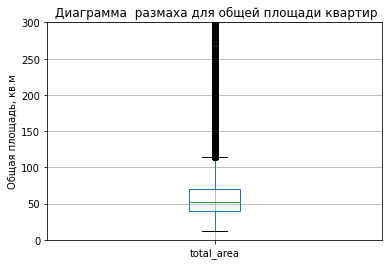

In [19]:
plt.ylim(0, 300)
data.boxplot(column='total_area')
plt.title(' Диаграмма  размаха для общей площади квартир')
plt.ylabel('Общая площадь, кв.м')
plt.show()

Большая часть значений лежит в диапазоне до 70 кв.м.
Первый квартиль находится на уровне 40 кв.м.
Нижний "ус" упирается в 12, минимальное значение(очень маленькие квартиры). 
Верхний ус заканчивается около 115 кв.м.
Данные за пределом верхнего уса будем считать вбросом
Для визуализации чиситых данных будем использовать диапазон между верхним и нижнем усом

Изучаем жилаю площадь таким же способ как и площадь квартиры

Выведем основную информацию по данным

In [20]:
display(data['living_area'].describe())


count    23565.000000
mean        33.875705
std         21.186871
min          2.000000
25%         19.000000
50%         30.000000
75%         41.000000
max        409.000000
Name: living_area, dtype: float64

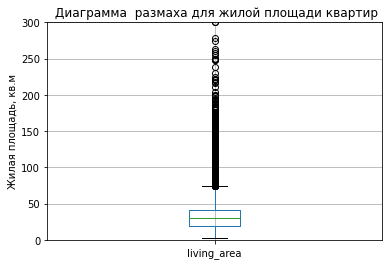

In [21]:
plt.ylim(0, 300)
data.boxplot(column='living_area')
plt.title(' Диаграмма  размаха для жилой площади квартир')
plt.ylabel('Жилая площадь, кв.м')
plt.show()

Большая часть значений лежит в диапазоне до 40 кв.м.
Первый квартиль находится на уровне 10 кв.м.
Нижний "ус" упирается в 2, минимальное значение(сложно представить, что есть квартиры с жилой площадью 2 кв.м, но при учете того что у нас есть квартиры с общей площадью12 кв.м, то возможно). 
Верхний ус заканчивается около 75 кв.м.
Данные за пределом верхнего уса будем считать вбросом
Для визуализации чситых данных будем использовать диапазон между верхним и нижнем усом

Работаем с площадью кухни

count    23565.000000
mean        10.189136
std          5.640145
min          1.000000
25%          7.000000
50%          9.000000
75%         11.000000
max        112.000000
Name: kitchen_area, dtype: float64


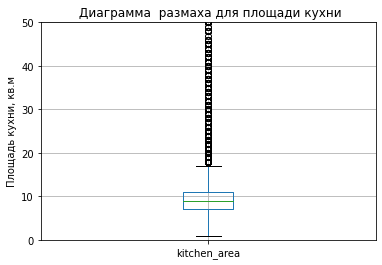

In [22]:
print(data['kitchen_area'].describe())
plt.ylim(0, 50)
data.boxplot(column='kitchen_area')
plt.title(' Диаграмма  размаха для площади кухни')
plt.ylabel('Площадь кухни, кв.м')
plt.show()

Большая часть значений лежит в диапазоне до 11 кв.м.
Первый квартиль находится на уровне 7 кв.м.
Нижний "ус" упирается в 1. 
Верхний ус заканчивается около 17 кв.м.
Данные за пределом верхнего уса будем считать вбросом
Для визуализации чситых данных будем использовать диапазон между верхним и нижнем усом

Изучаем стоимость таким же способ приведенным выше

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64


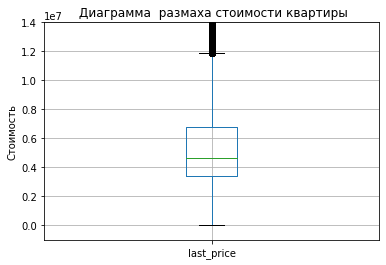

In [23]:
print(data['last_price'].describe())
plt.ylim(-1e+06, 1.4e+07)
data.boxplot(column='last_price')
plt.title(' Диаграмма  размаха стоимости квартиры')
plt.ylabel('Стоимость')
plt.show()

Большая часть значений лежит в диапазоне до 7 млн., что выглядит правдаподобно.
Первый квартиль на уровне 3.4 млн.
Нижний "ус" упирается в 0. С данными проблема, так как врядли квартиры раздают за бесценок
Просмотрим проблемные данные

In [24]:
cheap_realty = data.query('last_price < 4.5e+5')
cheap_realty.sort_values('last_price').head()[['locality_name', 'last_price', 'total_area']]

,locality_name,last_price,total_area
8793,Санкт-Петербург,12190,109.0
14911,поселок станции Свирь,430000,54.0
17456,Сланцы,430000,30.4
16274,деревня Старополье,440000,40.0


Квартира в Санкт- Петербурге с такой большой площадью, не может столько стоит, а вот для поселка стоимость в 430.000 нормальна. Нижнюю границу будем брать в 430000

Изучаем количество комнат

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64


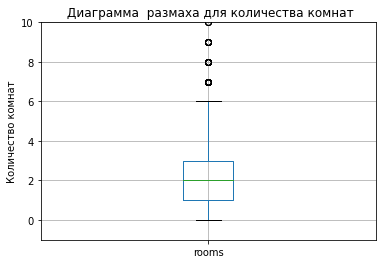

In [25]:
print(data['rooms'].describe())
plt.ylim(-1, 10)
data.boxplot('rooms')
plt.title(' Диаграмма  размаха для количества комнат')
plt.ylabel('Количество комнат')
plt.show()

Больше всего однушек,двушек и трехкомнатных квартир.
Первый квартиль находится на уровне 1 комнаты.
Нижний "ус" упирается в 0, минимальное значение. Это ошибка в данных. Таких квартир не существует
Верхний ус заканчивается около 6.
Выбросы лежат за ориентировочной границей нормального распределения.

Изучаем высоту потолков

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64


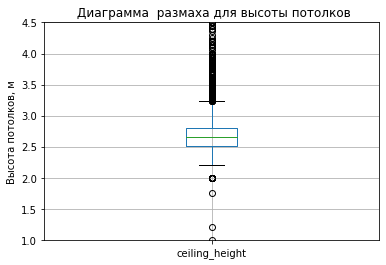

In [26]:
print(data['ceiling_height'].describe())
plt.ylim(1,4.5)
data.boxplot('ceiling_height')
plt.title(' Диаграмма  размаха для высоты потолков')
plt.ylabel('Высота потолков, м')
plt.show()


Большая часть значений лежит в диапазоне до 2.8 м. Нормальная высота потолка
Первый квартиль находится на уровне 2.5 м.
Нижний "ус" упирается в 2.2 м. Слишком низко, это ошибка. Возьмем для обработки данные чуть повыше на уровне 2.4
Верхний ус заканчивается около 3.2 м.

Изучаем общую этажность дома

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64


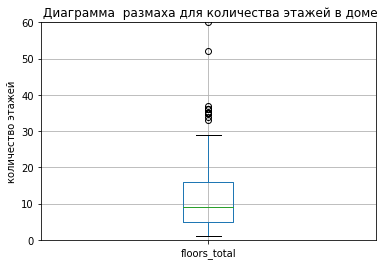

In [27]:
print(data['floors_total'].describe())
plt.ylim(0,60)
data.boxplot('floors_total')
plt.title(' Диаграмма  размаха для количества этажей в доме')
plt.ylabel('количество этажей')
plt.show()

Большая часть значений лежит в диапазоне до 15 этажа.
Первый квартиль находится на уровне 5 этажа.
Нижний "ус" упирается в 1. 
Верхний ус заканчивается на 29 этажах.
Данные за пределом верхнего уса будем считать вбросом
Для визуализации чситых данных будем использовать диапазон между верхним и нижнем усом

Изучаем информацию об этажах

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


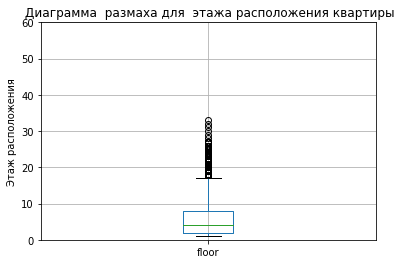

In [28]:
print(data['floor'].describe())
plt.ylim(0,60)
data.boxplot('floor')
plt.title(' Диаграмма  размаха для  этажа расположения квартиры')
plt.ylabel('Этаж расположения')
plt.show()

Большая часть значений лежит в диапазоне до 9 этажа.
Первый квартиль находится на уровне 2 этажа.
Нижний "ус" упирается в 1. 
Верхний ус заканчивается на 17 этаже.
Данные за пределом верхнего уса будем считать вбросом
Для визуализации чситых данных будем использовать диапазон между верхним и нижнем усом

Изучаем расстояние до центра города в м

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64


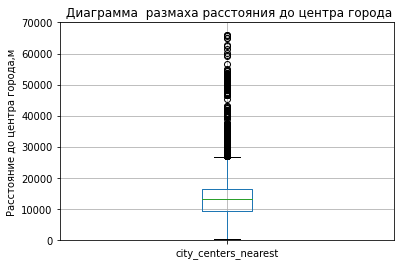

In [29]:
print(data['city_centers_nearest'].describe())
plt.ylim(0,70000)
data.boxplot('city_centers_nearest')
plt.title(' Диаграмма  размаха расстояния до центра города')
plt.ylabel('Расстояние до центра города,м')
plt.show()

Большая часть значений лежит в диапазоне до 15 км удаленности.
Первый квартиль находится на уровне 9км.
Нижний "ус" упирается в 0(квартиры в самом центре). 
Верхний ус заканчивается на 27 км(окраина).
Данные за пределом верхнего уса будем считать вбросом
Для визуализации чситых данных будем использовать диапазон между верхним и нижнем усом

Изучаем расстояние до ближайшего аэропорта

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


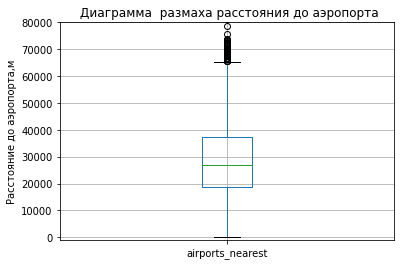

In [30]:
print(data['airports_nearest'].describe())
plt.ylim(-1000,80000)
data.boxplot('airports_nearest')
plt.title(' Диаграмма  размаха расстояния до аэропорта')
plt.ylabel('Расстояние до аэропорта,м')
plt.show()

Большая часть значений лежит в диапазоне до 38 км удаленности.
Первый квартиль находится на уровне 19км.
Нижний "ус" упирается в 0. Врядли квартира расположена в самом аэропорту, неверные данные, отбрасываем
Верхний ус заканчивается на 38 км(окраина).
Данные за пределом верхнего уса будем считать вбросом
Для визуализации чситых данных будем использовать диапазон между верхним и нижнем усом

Изучаем расстояние до ближайшего парка

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64


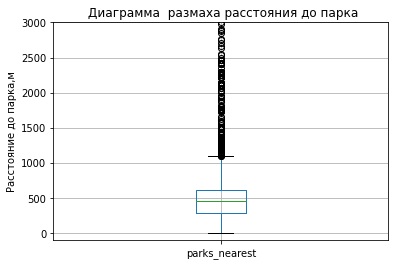

In [31]:
print(data['parks_nearest'].describe())
plt.ylim(-100,3000)
data.boxplot('parks_nearest')
plt.title(' Диаграмма  размаха расстояния до парка')
plt.ylabel('Расстояние до парка,м')
plt.show()

Большая часть значений лежит в диапазоне до 600м удаленности.
Первый квартиль находится на уровне 250м.
Нижний "ус" упирается в 0. Врядли квартира расположена в самом парке, неверные данные, отбрасываем
Верхний ус заканчивается на уадленности чуть больше 1 км(окраина).
Данные за пределом верхнего уса будем считать вбросом
Для визуализации чситых данных будем использовать диапазон между верхним и нижнем усом

Работаем с аномалиями и выбивающиемеся значениями

Создаем функцию для подсчёта границ с учетом 1.5 размаха

In [32]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq

Столбцы с выбросами

In [33]:
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)


Возвращаем в целочисленный тип число комнат

In [34]:
data['rooms'] = data['rooms'].fillna(0).astype(int)

Изучаем, есть ли выбивающиеся значения

In [35]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.151900e+04,22326.000000,23565.000000,13662.000000,23565.000000,22673.000000,23565.000000,21801.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,18721.000000
mean,9.878421,4.837115e+06,54.319704,2.013495,2.680072,10.675875,30.953204,5.878124,9.002110,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,128.299343
std,5.681156,2.215774e+06,19.331030,0.986750,0.184412,6.594823,12.987830,4.871485,2.662394,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,121.064671
min,0.000000,1.219000e+04,12.000000,0.000000,2.200000,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.300000e+06,39.400000,1.000000,2.500000,5.000000,19.000000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,41.000000
50%,9.000000,4.400000e+06,50.000000,2.000000,2.640000,9.000000,30.000000,4.000000,9.000000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,85.000000
75%,14.000000,6.000000e+06,65.500000,3.000000,2.760000,16.000000,39.000000,8.000000,10.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,182.000000
max,50.000000,1.186686e+07,114.200000,5.000000,3.230000,60.000000,73.000000,33.000000,16.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,509.000000


В датафрейме отброшены значения на основе 1.5 размаха. Значения стали лучше и адекватнее.

### Посчитайте и добавьте в таблицу новые столбцы

Рассчитаем цену одного квадратного метра, разделим цену на общую площадь и добавим новый столбец

In [36]:
data['area_price'] = data['last_price'] / data['total_area']
data['area_price'] = np.floor(pd.to_numeric(data['area_price'], errors='coerce')).astype('Int64')

Добавляем столбцы дня недели, месяца и года

In [37]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

Категоризируем этажи, используя цикл

In [38]:
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

Рассчитаем расстояние в км до центра города  и приведем данные к целочисленному типу

In [39]:
data['city_centers_nearest_km'] = data['city_centers_nearest'] / 1000
data['city_centers_nearest_km']=np.floor(pd.to_numeric(data['city_centers_nearest_km'], errors='coerce')).astype('Int64')


Выведем первые 10 строк таблицы

In [40]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,area_price,weekday,month,year,floor_type,city_centers_nearest_km
0,20,NaN,108.00,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,<NA>,<NA>,3,3,2019,другой,16
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.0,1,False,...,NaN,0,NaN,81,82920,1,12,2018,первый,18
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.0,4,False,...,90.0,2,574.0,<NA>,92785,3,8,2015,другой,13
3,0,NaN,NaN,2015-07-24,3,NaN,14,30.0,9,False,...,84.0,3,234.0,424,<NA>,4,7,2015,другой,6
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,112.0,1,48.0,121,100000,1,6,2018,другой,8
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.0,5,False,...,NaN,0,NaN,55,95065,0,9,2018,другой,<NA>
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.0,6,False,...,NaN,0,NaN,155,99195,3,11,2017,другой,19
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,30.0,22,False,...,NaN,0,NaN,<NA>,110544,3,4,2019,другой,11
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.0,26,False,...,NaN,0,NaN,189,87454,2,5,2018,другой,<NA>
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.0,7,False,...,NaN,0,NaN,289,88524,6,2,2017,другой,15


### Проведите исследовательский анализ данных

Построим гистограммы и проанализируем результаты

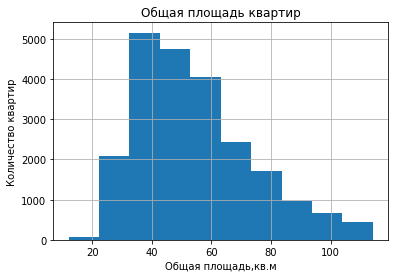

In [41]:
data.query('total_area >= 12 and total_area <= 115')['total_area'].hist()
plt.title('Общая площадь квартир')
plt.xlabel('Общая площадь,кв.м')
plt.ylabel('Количество квартир')
plt.show()

Самые популярные квартиры для размещения от 30 до 50 кв.метров.Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. 

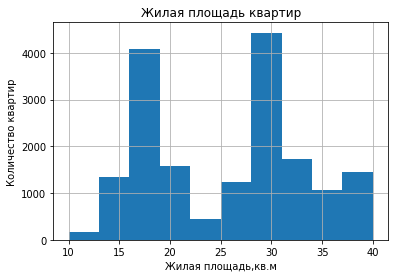

In [42]:
data.query('living_area >= 10 and living_area <= 40')['living_area'].hist()
plt.title('Жилая площадь квартир')
plt.xlabel('Жилая площадь,кв.м')
plt.ylabel('Количество квартир')
plt.show()

Самая популярная квадратура от 25 кв.м и до 32 кв. метров(однушки и студии), вторыми по популярности идут двушки(40 плюс квадратов). Были найдены и квартиры с жилой площадью 2 кв. метра, что логично при условии, что есть варинаты квартир с общей площадью 12кв.метров.Два пика графика вызваны, вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры.

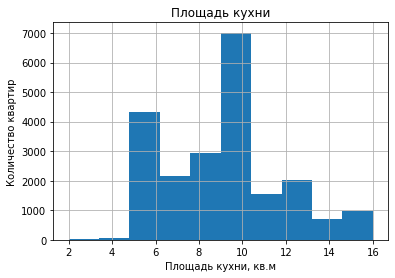

In [43]:
data.query('kitchen_area >= 1 and kitchen_area <= 17')['kitchen_area'].hist()
plt.title('Площадь кухни')
plt.xlabel('Площадь кухни, кв.м')
plt.ylabel('Количество квартир')
plt.show()

В основном площадь кухни занимает от 7 до 11 кв.метров

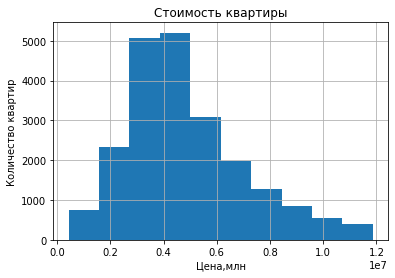

In [44]:
data.query('last_price >= 4.3e+5 and last_price <= 1.2e+7')['last_price'].hist()
plt.title('Стоимость квартиры')
plt.xlabel('Цена,млн')
plt.ylabel('Количество квартир')
plt.show()

В основном стоимость квартир - порядка 5 миллионов. Больше 20 миллионов вариантов мало и они выглядят очень странно и некоторые - на порядок дороже.

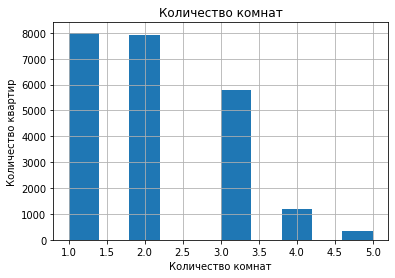

In [45]:
data.query('rooms >= 1 and rooms <= 6')['rooms'].hist()
plt.title('Количество комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

В основном квартиры состоят из 1, 2 и 3 комнат. Есть небольшая доля 4-комнатных квартир. 

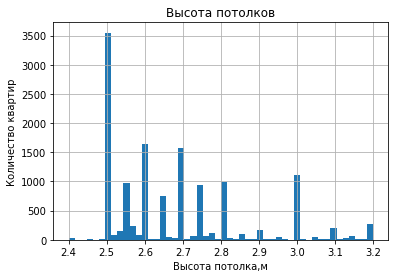

In [46]:
data.query('ceiling_height >= 2.4 and ceiling_height <= 3.2')['ceiling_height'].hist(bins=50)
plt.title('Высота потолков')
plt.xlabel('Высота потолка,м')
plt.ylabel('Количество квартир')
plt.show()

Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Больше 4 метров высота потолков выглядит страно.

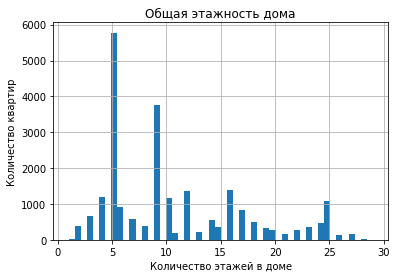

In [47]:
data.query('floors_total >= 1 and floors_total <= 29')['floors_total'].hist(bins=50)
plt.title('Общая этажность дома')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество квартир')
plt.show()


Самыми популярными являются 5-этажки и 9-этажки (в целом вторичный рынок в основном состоит из таких домов), скорее всего мало квартир выставлено в малоэтажных зданиях, так как они возможно находяться в аварийном состоянии, есть шанс на расселение, а небоскребы-новые дома, либо с большой ценой, либо в новом районе с плохой инфраструктурой, поэтому менее популярны

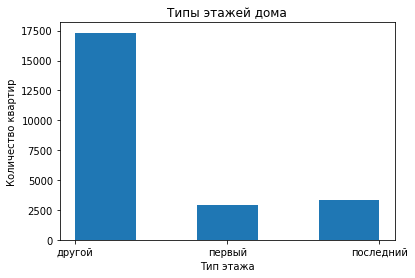

In [48]:
plt.hist(data['floor_type'], bins=5)
plt.title('Типы этажей дома')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Меньше всего объявлений на первом и последнем этажах, все что между является более популярным

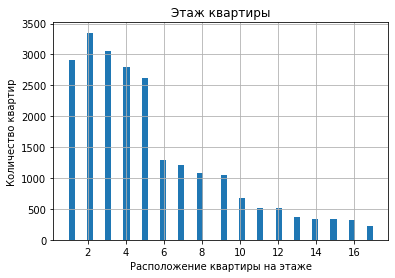

In [49]:
data.query('floor >= 1 and floor <= 17')['floor'].hist(bins=50)
plt.title('Этаж квартиры')
plt.xlabel('Расположение квартиры на этаже')
plt.ylabel('Количество квартир')
plt.show()

Чем выше этаж, тем меньше количество квартир на продаже, все что в середине наиболее популярно(1-5 этаж), также не будем забывать, что высотки в целом не особо популярны

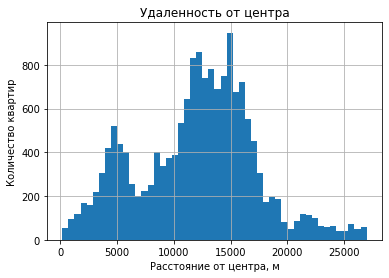

In [50]:
data.query('city_centers_nearest >= 0 and city_centers_nearest <= 27000')['city_centers_nearest'].hist(bins=50)
plt.title('Удаленность от центра')
plt.xlabel('Расстояние от центра, м')
plt.ylabel('Количество квартир')
plt.show()

В основном квартиры продаются от 11км до 17км от центра, оптимальная удаленность для спального района

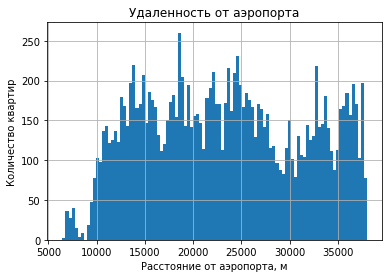

In [51]:
data.query('airports_nearest >= 1000 and airports_nearest <= 38000')['airports_nearest'].hist(bins=100)
plt.title('Удаленность от аэропорта')
plt.xlabel('Расстояние от аэропорта, м')
plt.ylabel('Количество квартир')
plt.show()

Вблизи аэропорта в целом мало квартир, объявления о продаже в основном размещены с данными об удаленности +12км от аэропорта.

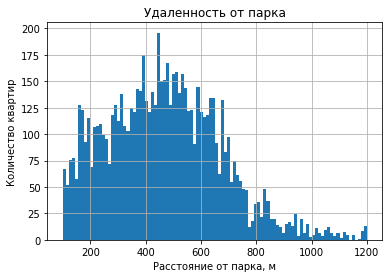

In [52]:
data.query('parks_nearest >= 100 and parks_nearest <= 1200')['parks_nearest'].hist(bins=100)
plt.title('Удаленность от парка')
plt.xlabel('Расстояние от парка, м')
plt.ylabel('Количество квартир')
plt.show()

Среднее расстояние от парка 400, 600 метров, хороший показатель для спальных районов и признак развитой инфраструктуры

count    23565.000000
mean         2.567367
std          1.788279
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64


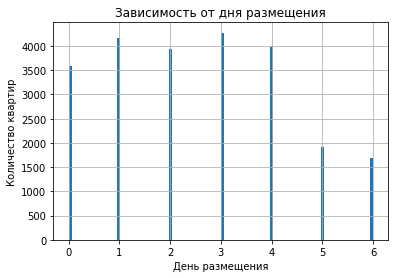

In [53]:
print(data['weekday'].describe())
data.query('weekday >= 0 and weekday <= 7')['weekday'].hist(bins=100)
plt.title('Зависимость от дня размещения')
plt.xlabel('День размещения')
plt.ylabel('Количество квартир')
plt.show()

Основные дни размещения объявлений вт и чт, на выходных размещают объявления о продаже меньше всего

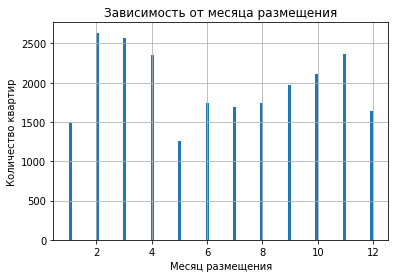

In [54]:
data.query('month >= 0 and month <= 12')['month'].hist(bins=100)
plt.title('Зависимость от месяца размещения')
plt.xlabel('Месяц размещения')
plt.ylabel('Количество квартир')
plt.show()

Пики размещений приходяться на конец зимы и начало весны, а также начало зимнего периода. Меньше всего размещают объявления летом

Изучим данные о времени продажи квартиры

Отбрасываем маркеры пустых значений и выводим данные о медиане и среднем значении

In [55]:
print('Время продажи (медиана):', round(data.query('days_exposition != 9999')['days_exposition'].median()),'\n')
print('Время продажи (среднее):', round(data.query('days_exposition != 9999')['days_exposition'].mean()),'\n')

Время продажи (медиана): 85 

Время продажи (среднее): 128 



Гистограма времени продажи

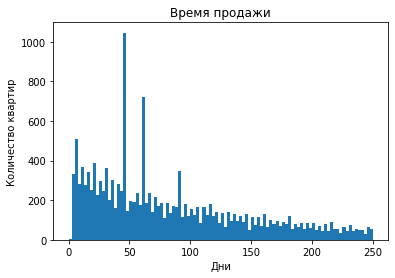

In [56]:
plt.hist(data.query('days_exposition != 9999')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()

Изучаем значения срока продажи

In [57]:
data.query('days_exposition != 9999')['days_exposition'].describe()

count    18721.000000
mean       128.299343
std        121.064671
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        509.000000
Name: days_exposition, dtype: float64

Медианное время продажи - 95 дней. Среднее время продажи - 113 день.
В основном квартиры продаются за срок в 90-100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Изучим зависимость цены от площади

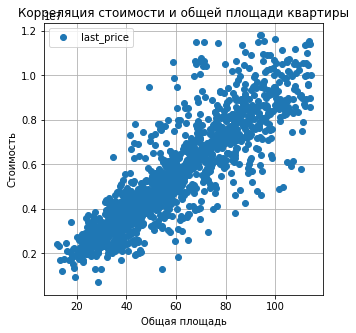

Корреляция цены и площади: 

            last_price  total_area
last_price    1.000000    0.905372
total_area    0.905372    1.000000 



In [58]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Корреляция стоимости и общей площади квартиры')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')


Изучим зависимость цены от жилой площади

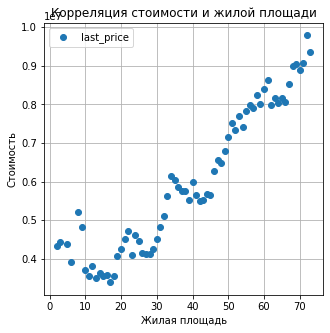

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.738101
living_area    0.738101     1.000000 



In [59]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Корреляция стоимости и жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

Изучим зависимость цены от площади кухни

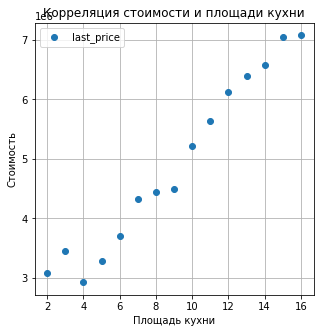

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.816397
last_price        0.816397    1.000000 



In [60]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.title('Корреляция стоимости и площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

Зависимость цены от числа комнат

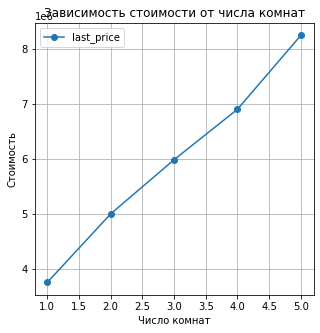

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.537551
rooms         0.537551  1.000000 



In [61]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость стоимости от числа комнат')
plt.xlabel('Число комнат')
plt.ylabel('Стоимость')
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Зависимость цены от этажа

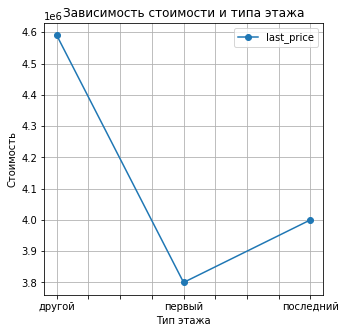

In [62]:
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость стоимости и типа этажа')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость')
plt.show()

Зависимость от дня размещения

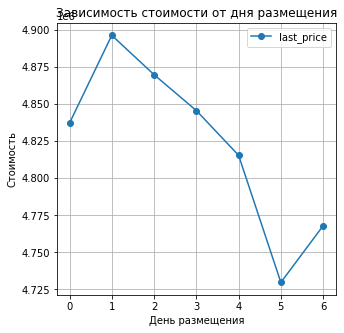

In [63]:

(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость стоимости от дня размещения')
plt.xlabel('День размещения')
plt.ylabel('Стоимость')
plt.show()

Зависимость от месяца размещения

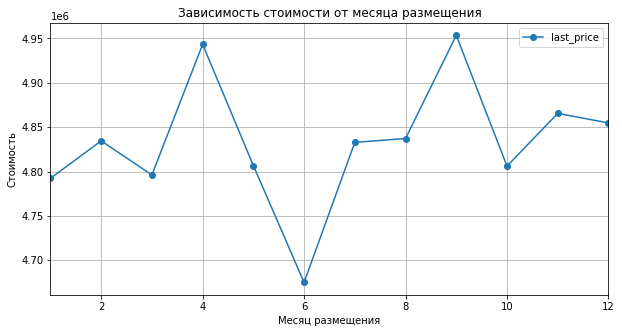

In [64]:
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.title('Зависимость стоимости от месяца размещения')
plt.xlabel('Месяц размещения')
plt.ylabel('Стоимость')
plt.show()

Зависимость от года размещения

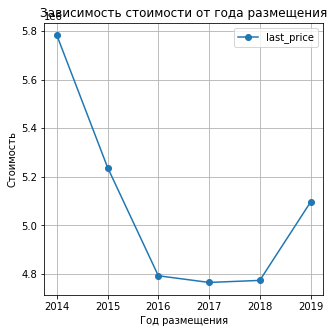

In [65]:
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость стоимости от года размещения')
plt.xlabel('Год размещения')
plt.ylabel('Стоимость')
plt.show()

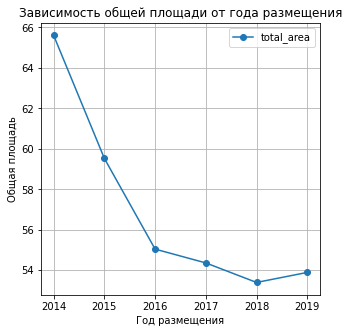

In [66]:
(
    data.pivot_table(index='year', values='total_area')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость общей площади от года размещения')
plt.xlabel('Год размещения')
plt.ylabel('Общая площадь')
plt.show()

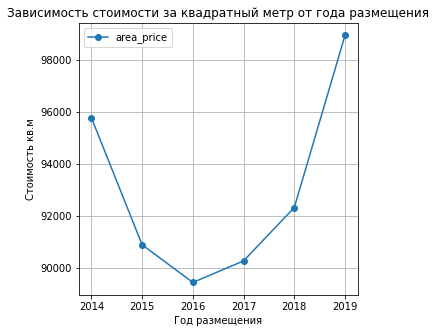

In [67]:
(
    data.pivot_table(index='year', values='area_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость стоимости за квадратный метр от года размещения')
plt.xlabel('Год размещения')
plt.ylabel('Стоимость кв.м')
plt.show()

Чем больше площадь, тем выше стоимость. Корреляция этих параметров крайне высокая.

Корреляция площади кухни и жилой площади небольщая, не влияющие факторы на выборки, при этом на цену жилая площадь влияет сильнее, чем площадь кухни, что логично.

Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. 

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

День недели: дороже всего квартиры, опубликованные во вторник, дешевле всего - в субботу.

Месяц: дороже всего квартиры, продающиеся с апреля и с сентября, дешевле всего - с июня

Год: квартиры очень сильно подешевели в 2016-2018 годах, что, вероятно, вызвано некоторым кризисом 2014-2015 годов. В 2019 году цены снова стали повышаться, т.к. экономика и зарплаты скорее на подъёме.
Общая жилая площадь квартир в 2014-2015 годах была выше, а цена ниже. В целом цена за кв.м  доражает со временем.

Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений

In [68]:
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='area_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('area_price', ascending=False)

,area_price
locality_name,
Санкт-Петербург,105685
Пушкин,100461
Кудрово,95086
поселок Парголово,90331
Мурино,86040
поселок Шушары,78577
Колпино,75221
Гатчина,68663
Всеволожск,67221


Наибольшая средняя стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Затем идёт Пушкин, что, вероятно, вызвано хорошей застройкой и большим количеством парков. Затем идут районы, фактически являющиеся Санкт-Петербургом и непосредственно к нему примыкают. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске, из которых далеко ехать до Санкт-Петербурга, а также неболшой по численности населения Выборг, расположенный на большом расстоянии от Санкт-Петербурга.

Выделим квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислим среднюю цену каждого километра

Выбираем только квартиры в спб

In [69]:
data = data.query('locality_name == "Санкт-Петербург"') 

Рассчитываем среднюю цену для каждого км

In [70]:
data_mean_price_per_m = data['area_price'].mean() 
data['mean_price_for_km'] = data_mean_price_per_m / data['city_centers_nearest_km'] 
print('Средняя стоимость за км:', data_mean_price_per_m)

Средняя стоимость за км: 105685.8074708401


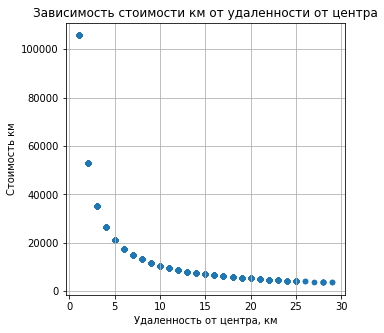

In [71]:
data.plot(x='city_centers_nearest_km', y='mean_price_for_km', kind='scatter', figsize=(5, 5), grid=True)
plt.title('Зависимость стоимости км от удаленности от центра')
plt.xlabel('Удаленность от центра, км')
plt.ylabel('Стоимость км')
plt.show()

Средняя стоимость за километр 105685, чем ближе к центру, тем выше стоимость, что логично

### Общий вывод

В таблице с данными было много пропусков. Пропуски были заполнены, а типы данных приведены к одному формату. Данные были нормализованы, все аномальные данные обработаны.
Были изучены основные факторы влияющие на стоимость объектов для продажи, а также на количество объявлений.
Самые часто размещаемые объявления о продаже имели такие признаки:
- Общая площадь от 30 кв.м до 50 кв.м, чуть менее популяра площадь в районе 20 кв.м
- Жилая площадь от 25 кв.м до 32 кв.м (студии, однушки, двухкомнатные квартиры в ходу на рынки недвижимости). 
- Площадь кухни от 7кв.м до 11 кв.м.
- Средняя стоимость в районе 5 млн. рублей
- Популярными являются 5-этажки и 9-этажки. Что обусловлено скорее всего большим довереем к вторичному жилью. с эти еще и связана высота- потока наиболее распространеная 2.5 м (обычное значение для вторички)
- Много квартир размещено рядом с парками, в приличной удаленности от аэропорта.
- Этаж размещения квартиры также играет важную роль. Первые и последние этажи наименее популярны.
- Основные дни размещения объявлений вт и чт, на выходных размещают объявления о продаже меньше всего
- Пики размещений приходяться на конец зимы и начало весны, а также начало зимнего периода. Меньше всего размещают объявления летом

Среднее время продажи квартиры 95 дней.

Также были рассмотрены факторы, влияющие на стоимость. Были выявлены ключевые факторы:

- Общая площадь. Чем больше площадь, тем выше стоимость.
- Число комнат. Чем больше комнат, тем дороже квартира.
- Первый и последний этаж сделают цену квартиры меньше(особенно первый). Наибольшая стоимость у квартир, расположенных между первым и последнем этажои
- Дороже всего квартиры, опубликованные во вторник, дешевле всего - в субботу.
- Дороже всего квартиры, продающиеся с апреля и с сентября, дешевле всего - с июня
- Также квартиры дорожают с течением времени. Если решаться на покупку, то лучше не тянуть.

Были расмотрены населенные пункты и изучена средняя стоимость квадратного метра: как и ожидалось кв.м площади самый дорогой в г. Саекнт- петербурге, и его стоимость становиться дешевле в зависимости от удаленности. Наименьшая стоимость из 10 город в Выборге(молонаселенный и достаточно удаленноый от г. Санкт-петербурга город)
